# <p  style="color:rgb(255, 99, 71);">Part Two: Exploration of `northwind.sqlite` Database</p>

In this document we'll be exploring the performance of the nine employees listed in the _`northwind.sqlite`_ database. The _'northwind'_ database is sample database created by Microsoft for let's say, abc company having business model related to food and beverages distribution. This database contains details for the products, categories, customers, orders, inventory, purchasing, suppliers, shipping and also employees!

For this Project, we'll explore more on employees based on below criteria such as:
* how much quantity they sold
* products of total amount sold
* how many products sold
* employee's regional performance
* employee's overall performance over the time, 
* employee's strengths, and weaknesses. 

To get started, first we need to import below libraries.
1. import sqlite3
2. import pandas as pd
3. import numpy as np
4. from collections import Counter
5. import matplotlib.pyplot as plt
6. import seaborn as sns

Now, let's deep dive into database tables and take a look at the data provided to get a meaningful insights from a business model.

In [133]:
import sqlite3
import pandas as pd
import numpy as np

con = sqlite3.connect("northwind.sqlite")

In [134]:
pd.read_sql("SELECT * FROM sqlite_schema WHERE type = 'table' ORDER BY name", con)

,type,name,tbl_name,rootpage,sql
0,table,Categories,Categories,2,CREATE TABLE [Categories]\n( [CategoryID]...
1,table,CustomerCustomerDemo,CustomerCustomerDemo,28,CREATE TABLE [CustomerCustomerDemo](\n [Cust...
2,table,CustomerDemographics,CustomerDemographics,30,CREATE TABLE [CustomerDemographics](\n [Cust...
3,table,Customers,Customers,32,CREATE TABLE [Customers]\n( [CustomerID] ...
4,table,EmployeeTerritories,EmployeeTerritories,68,CREATE TABLE [EmployeeTerritories](\n [Emplo...
5,table,Employees,Employees,38,CREATE TABLE [Employees]\n( [EmployeeID] ...
6,table,Order Details,Order Details,70,CREATE TABLE [Order Details](\n [OrderID]INT...
7,table,Orders,Orders,92,CREATE TABLE [Orders](\n [OrderID]INTEGER NO...
8,table,Products,Products,128,CREATE TABLE [Products](\n [ProductID]INTEGE...
9,table,Regions,Regions,132,CREATE TABLE [Regions](\n [RegionID]INTEGER ...


## Below data displays the quantity sold by each employee for each product.  

In [135]:
firstCall = '''
            SELECT d.OrderID, d.ProductID,  d.Quantity, p.ProductName, p.CategoryID, c.CategoryName, o.EmployeeID, e.FirstName, 
                   e.LastName, e.Title FROM 'Order Details' as d
                INNER JOIN Orders as o ON o.OrderID = d.OrderID
                INNER JOIN Employees as e ON e.EmployeeID = o.EmployeeID
                INNER JOIN Products as p ON p.ProductID = d.ProductID
                INNER JOIN Categories as c ON c.CategoryID = p.CategoryID
            '''
#where e.EmployeeID =1 and p.ProductID = '2' #231
sellQty = pd.read_sql(firstCall, con)
sellQty = sellQty.groupby(['EmployeeID', 'ProductID']).agg({'Quantity' : sum, 
                                                            'ProductName' : 'first', 
                                                            'CategoryName' : 'first', 
                                                            'FirstName' : 'first', 
                                                            'LastName' : 'first', 
                                                            'Title' : 'first'
                                                           })
sellQty

Quantity                        ProductName  \
EmployeeID ProductID                                                
1          1                80                               Chai   
           2               231                              Chang   
           3                68                      Aniseed Syrup   
           4                 6       Chef Anton's Cajun Seasoning   
           5                65             Chef Anton's Gumbo Mix   
...                        ...                                ...   
9          72                8             Mozzarella di Giovanni   
           74               36                      Longlife Tofu   
           75              110             RhÃ¶nbrÃ¤u Klosterbier   
           76               73                     LakkalikÃ¶Ã¶ri   
           77               53  Original Frankfurter grÃ¼ne SoÃŸe   

                        CategoryName FirstName   LastName  \
EmployeeID ProductID                                        
1          1               Beverages     Nancy    Davolio   
           2               Beverages     Nancy    Davolio   
           3              Condiments     Nancy    Davolio   
           4              Condiments     Nancy    Davolio   
           5              Condiments     Nancy    Davolio   
...                              ...       ...        ...   
9          72         Dairy Products      Anne  Dodsworth   
           74                Produce      Anne  Dodsworth   
           75              Beverages      Anne  Dodsworth   
           76              Beverages      Anne  Dodsworth   
           77             Condiments      Anne  Dodsworth   

                                     Title  
EmployeeID ProductID                        
1          1          Sales Representative  
           2          Sales Representative  
           3          Sales Representative  
           4          Sales Representative  
           5          Sales Representative  
...                                    ...  
9          72         Sales Representative  
           74         Sales Representative  
           75         Sales Representative  
           76         Sales Representative  
           77         Sales Representative  

[588 rows x 6 columns]

This is high level we got details about the quantity sold by eamployees. But when we took a closer look at `Order Details` table, we observe column as `Discount` where we see more scope on analysis. 
Note : Since we have table name containing space in it, this table name needed to access carefully. 
To access this table, there are 2 choices :
* Rename Table using sql query - __RENAME TABLE old_table TO new_table;__ and <div  style="color:rgb(99, 255, 71);">_##### NOT TO FORGET #####_ </div>__COMMIT;__ command to avoid database to be locked without committing database changes. 
* Other option to use tablename like __[Order Details]__ in Panda and __'Order Details'__ in SQL.

In [136]:
orderDet = pd.read_sql('select * from [Order Details]', con)
orderDet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   OrderID    2155 non-null   int64  
 1   ProductID  2155 non-null   int64  
 2   UnitPrice  2155 non-null   float64
 3   Quantity   2155 non-null   int64  
 4   Discount   2155 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 84.3 KB


So let's see how many products got sold on full price vs discounted price by each employee.

In [137]:
sellQtyFullPrice = pd.read_sql(firstCall+' where Discount = 0.00', con)
sellQtyFullPrice = sellQty.groupby(['EmployeeID', 'ProductID']).agg({'Quantity' : sum, 'ProductName' : 'first', 'CategoryName' : 'first', 'FirstName' : 'first', 'LastName' : 'first', 'Title' : 'first'})

x = sellQtyFullPrice.ProductName.astype("category")
y = sellQtyFullPrice.FirstName.astype("category")
pd.crosstab(
    index = [x, sellQtyFullPrice.Quantity],
    columns = y, margins=True)

FirstName               Andrew  Anne  Janet  Laura  Margaret  Michael  Nancy  \
ProductName   Quantity                                                         
Alice Mutton  16             0     1      0      0         0        0      0   
              74             0     0      0      0         0        0      0   
              76             0     0      0      1         0        0      0   
              100            0     0      1      0         0        0      0   
              110            0     0      0      0         0        0      1   
...                        ...   ...    ...    ...       ...      ...    ...   
Zaanse koeken 40             0     1      0      0         0        0      0   
              50             0     0      0      0         0        1      0   
              98             0     0      1      0         0        0      0   
              151            0     0      0      0         1        0      0   
All                         68    53     74     70        75       57     72   

FirstName               Robert  Steven  All  
ProductName   Quantity                       
Alice Mutton  16             0       0    1  
              74             1       0    1  
              76             0       0    1  
              100            0       0    1  
              110            0       0    1  
...                        ...     ...  ...  
Zaanse koeken 40             0       0    1  
              50             0       1    2  
              98             0       0    1  
              151            0       0    1  
All                         67      52  588  

[573 rows x 10 columns]

Better to take a look at Graphical Representation for more in details....

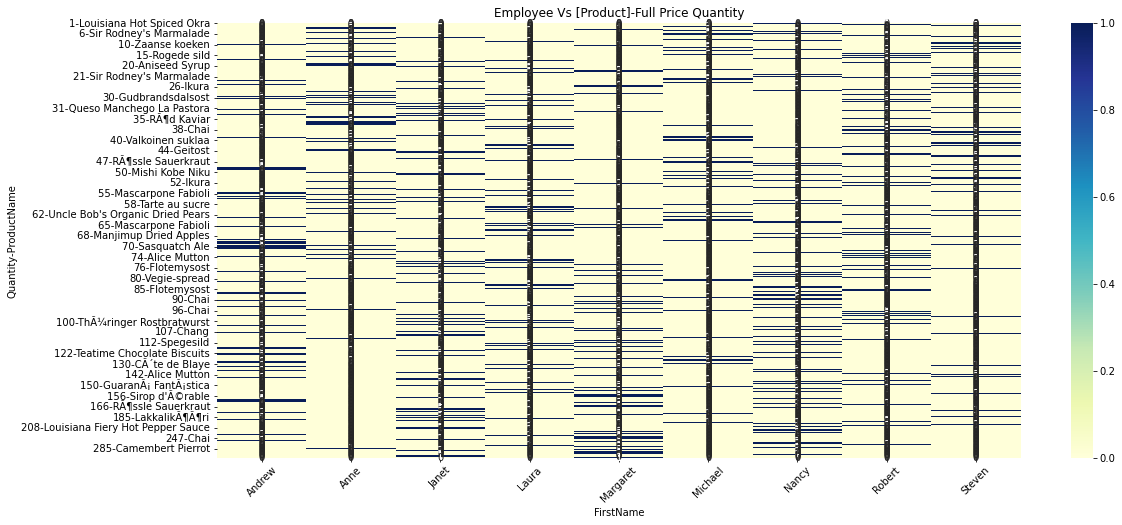

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt



plt.figure(figsize=(18, 8))
sellQtyFullPriceTab = sns.heatmap(pd.crosstab(
    index = [sellQtyFullPrice.Quantity,x],
    columns = y), cmap="YlGnBu", annot=True, cbar=True)
plt.xticks(rotation = 45)
plt.title("Employee Vs [Product]-Full Price Quantity")
plt.show()


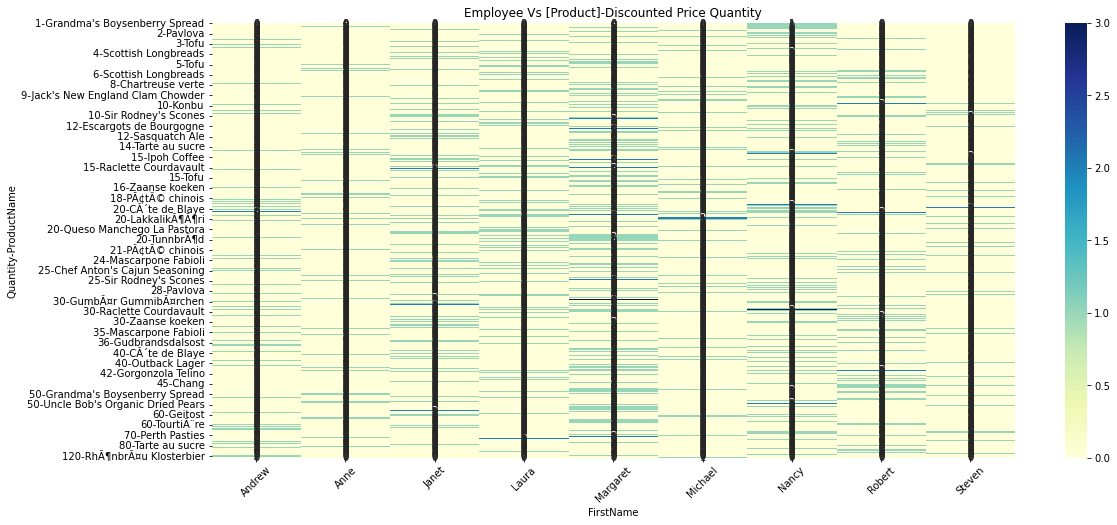

In [139]:

sellQtyDiscountPrice = pd.read_sql(firstCall+' where Discount != 0.00', con)
sellQtyFullPrice = sellQtyDiscountPrice.groupby(['EmployeeID', 'ProductID']).agg({'Quantity' : sum, 'ProductName' : 'first', 'CategoryName' : 'first', 'FirstName' : 'first', 'LastName' : 'first', 'Title' : 'first'})


plt.figure(figsize=(18, 8))
x_disc = sellQtyDiscountPrice.ProductName.astype("category")
y_disc = sellQtyDiscountPrice.FirstName.astype("category")
sellQtyDiscountPrice = sns.heatmap(pd.crosstab(
    index = [sellQtyDiscountPrice.Quantity, x_disc],
    columns = y_disc), cmap="YlGnBu", annot=True, cbar=True)
plt.xticks(rotation = 45)
plt.title("Employee Vs [Product]-Discounted Price Quantity")
plt.show()

Based on above graphical representations, we observe that Gergonzola Telino got sold max on full price with quantity as 204 and  Jack's New England Clam Powder got sold max with the quantity 80. We haven't finished with our analysis here. Later we will find the common product getting sold by each employee!

## Which Products are Sold?  

The query below gathers data from the Order Details, Orders, Employees, Products, and Categories tables to explore the sales history of each employee.  

In [140]:
productSold = pd.read_sql(firstCall, con)
productSold = productSold.drop(productSold['Quantity'])
productSold

,OrderID,ProductID,Quantity,ProductName,CategoryID,CategoryName,EmployeeID,FirstName,LastName,Title
0,10248,11,12,Queso Cabrales,4,Dairy Products,5,Steven,Buchanan,Sales Manager
17,10254,24,15,GuaranÃ¡ FantÃ¡stica,1,Beverages,5,Steven,Buchanan,Sales Manager
19,10254,74,21,Longlife Tofu,7,Produce,5,Steven,Buchanan,Sales Manager
23,10255,59,30,Raclette Courdavault,4,Dairy Products,9,Anne,Dodsworth,Sales Representative
26,10257,27,25,Schoggi Schokolade,3,Confections,4,Margaret,Peacock,Sales Representative
...,...,...,...,...,...,...,...,...,...,...
2150,11077,64,2,Wimmers gute SemmelknÃ¶del,5,Grains/Cereals,1,Nancy,Davolio,Sales Representative
2151,11077,66,1,Louisiana Hot Spiced Okra,2,Condiments,1,Nancy,Davolio,Sales Representative
2152,11077,73,2,RÃ¶d Kaviar,8,Seafood,1,Nancy,Davolio,Sales Representative
2153,11077,75,4,RhÃ¶nbrÃ¤u Klosterbier,1,Beverages,1,Nancy,Davolio,Sales Representative


First, we'll find each employee's most popular product. Note that this is computed using how frequently the product is ordered, not the quantity ordered.  

In [141]:
from collections import Counter

def most_common_item(List):
    Occurence_count = Counter(List)
    return Occurence_count.most_common(1)[0][0]


In [142]:
buchanan = productSold[productSold['LastName'] == 'Buchanan']
buc = most_common_item(buchanan.ProductName)

callahan = productSold[productSold['LastName'] == 'Callahan']
cal = most_common_item(callahan.ProductName)

davolio = productSold[productSold['LastName'] == 'Davolio']
dav = most_common_item(davolio.ProductName)

dodsworth = productSold[productSold['LastName'] == 'Dodsworth']
dod = most_common_item(dodsworth.ProductName)

fuller = productSold[productSold['LastName'] == 'Fuller']
ful = most_common_item(fuller.ProductName)

king = productSold[productSold['LastName'] == 'King']
kin = most_common_item(king.ProductName)

leverling = productSold[productSold['LastName'] == 'Leverling']
lev = most_common_item(leverling.ProductName)

peacock = productSold[productSold['LastName'] == 'Peacock']
pea = most_common_item(peacock.ProductName)

suyama = productSold[productSold['LastName'] == 'Suyama']
suy = most_common_item(suyama.ProductName)

keys = list(productSold.LastName.unique())
values = [buc, suy, pea, lev, dod, dav, cal, ful, kin]
comprod = pd.DataFrame(zip(keys,values), columns = ["Employee", "Most Common Product Sold"])
comprod

,Employee,Most Common Product Sold
0,Buchanan,Mozzarella di Giovanni
1,Dodsworth,Gorgonzola Telino
2,Peacock,Gnocchi di nonna Alice
3,Davolio,GumbÃ¤r GummibÃ¤rchen
4,Callahan,Raclette Courdavault
5,Suyama,Flotemysost
6,Leverling,Steeleye Stout
7,Fuller,Singaporean Hokkien Fried Mee
8,King,Sasquatch Ale


Next, we'll look at the distribution of orders over each product category across employees. Let's first create a table with this information:  

In [143]:
catbyemp = pd.crosstab(productSold.LastName, productSold.CategoryName)
catbyemp

CategoryName,Beverages,Condiments,Confections,Dairy Products,Grains/Cereals,Meat/Poultry,Produce,Seafood
LastName,,,,,,,,
Buchanan,21,8,15,30,8,10,10,12
Callahan,51,28,42,33,25,23,16,37
Davolio,58,30,56,65,21,25,28,58
Dodsworth,22,15,12,25,3,6,2,17
Fuller,44,24,34,36,27,24,12,36
King,36,20,27,31,14,15,9,23
Leverling,62,25,51,49,35,20,15,53
Peacock,72,43,68,52,44,35,24,66
Suyama,29,15,22,37,12,10,17,20


Below we can visually represent the data from the table above using a bar plot. Some observations to note are that Peacock has the most sales overall, and their most frequently ordered products are from the Beverages category. The most popular categories for each employee are summarized in the table below:  

| Employee | Category |  
| -------- | -------- |  
| Buchanan | Dairy Products |  
| Callahan | Beverages |  
| Davolio | Dairy Products |  
| Dodsworth | Dairy Products |  
| Fuller | Beverages |  
| King | Beverages |  
| Leverling | Beverages |  
| Peackock | Beverages |  
| Suyama | Dairy Products |  

Text(0.5, 1.0, 'Frequency of Orders Across Product Categories for Each Employee')

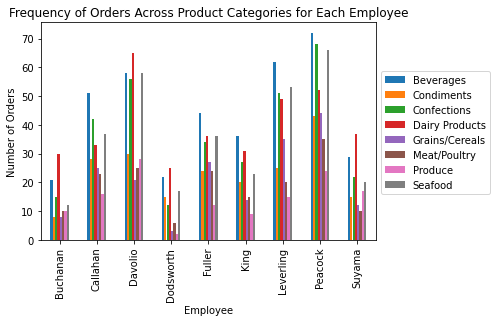

In [144]:
catbyemp.plot.bar()
plt.legend(loc = 'upper left', bbox_to_anchor = (1, 0.8))
plt.xlabel("Employee")
plt.ylabel("Number of Orders")
plt.title("Frequency of Orders Across Product Categories for Each Employee")

Clearly, the product categories with the most orders are Beverages and Dairy Products. The number of employees with either as their most popular category is almost split evenly. It should also be noted that the employees with the best sales records are Peacock, Leverling, and Davolio.  

## Performance Across the Years  

Now we'll examine employee performance across the years. This is best examined by looking at total revenue from each employee during each year, so we'll pull data from the Order Details, Orders, and Employees tables.  

In [145]:
second_call = '''
              SELECT d.OrderID, d.UnitPrice, d.Quantity, d.Discount, o.EmployeeID, e.LastName, o.OrderDate 
                     FROM 'Order Details' as d
                  INNER JOIN Orders as o ON o.OrderId = d.OrderID
                  INNER JOIN Employees as e ON e.EmployeeID = o.EmployeeID
              '''

sales = pd.read_sql(second_call, con)
sales

,OrderID,UnitPrice,Quantity,Discount,EmployeeID,LastName,OrderDate
0,10248,14.00,12,0.00,5,Buchanan,1996-07-04 00:00:00.000
1,10248,9.80,10,0.00,5,Buchanan,1996-07-04 00:00:00.000
2,10248,34.80,5,0.00,5,Buchanan,1996-07-04 00:00:00.000
3,10249,18.60,9,0.00,6,Suyama,1996-07-05 00:00:00.000
4,10249,42.40,40,0.00,6,Suyama,1996-07-05 00:00:00.000
...,...,...,...,...,...,...,...
2150,11077,33.25,2,0.03,1,Davolio,1998-05-06 00:00:00.000
2151,11077,17.00,1,0.00,1,Davolio,1998-05-06 00:00:00.000
2152,11077,15.00,2,0.01,1,Davolio,1998-05-06 00:00:00.000
2153,11077,7.75,4,0.00,1,Davolio,1998-05-06 00:00:00.000


Now we need to create a couple of new variables to find the exact information we're looking for. First, we'll use the `OrderDate` variable and extract only the first four characters of the string to create an `OrderYear` variable. Then we'll define a function that uses `UnitPrice`, `Quantity`, and `Discount` to calculate the total revenue for each order. We'll call this variable `OrderRevenue`.  

In [146]:
sales['OrderYear'] = sales.OrderDate.str[:4]

def tot_rev(unitprice, quantity, discount):
    subtot = unitprice * quantity
    disc = subtot * discount
    tot = subtot - disc
    return tot

sales['OrderRevenue'] = tot_rev(sales.UnitPrice, sales.Quantity, sales.Discount)
sales

,OrderID,UnitPrice,Quantity,Discount,EmployeeID,LastName,OrderDate,OrderYear,OrderRevenue
0,10248,14.00,12,0.00,5,Buchanan,1996-07-04 00:00:00.000,1996,168.000
1,10248,9.80,10,0.00,5,Buchanan,1996-07-04 00:00:00.000,1996,98.000
2,10248,34.80,5,0.00,5,Buchanan,1996-07-04 00:00:00.000,1996,174.000
3,10249,18.60,9,0.00,6,Suyama,1996-07-05 00:00:00.000,1996,167.400
4,10249,42.40,40,0.00,6,Suyama,1996-07-05 00:00:00.000,1996,1696.000
...,...,...,...,...,...,...,...,...,...
2150,11077,33.25,2,0.03,1,Davolio,1998-05-06 00:00:00.000,1998,64.505
2151,11077,17.00,1,0.00,1,Davolio,1998-05-06 00:00:00.000,1998,17.000
2152,11077,15.00,2,0.01,1,Davolio,1998-05-06 00:00:00.000,1998,29.700
2153,11077,7.75,4,0.00,1,Davolio,1998-05-06 00:00:00.000,1998,31.000


In [147]:
timerev = pd.pivot_table(sales, values = ["OrderRevenue"], index = ["LastName"], aggfunc = ["sum"])
timerev

,sum
,OrderRevenue
LastName,
Buchanan,68792.2825
Callahan,126862.2775
Davolio,192107.6045
Dodsworth,77308.0665
Fuller,166537.7550
King,124568.2350
Leverling,202812.8430
Peacock,232890.8460


Using the new variables computed above, we can create a table listing the revenue for each employee for each of the three years.  

In [148]:
timerev = pd.pivot_table(sales, values = ["OrderRevenue"], index = ["LastName", "OrderYear"], aggfunc = ["sum"])
timerev

sum
                    OrderRevenue
LastName  OrderYear             
Buchanan  1996        18383.9200
          1997        30716.4675
          1998        19691.8950
Callahan  1996        22240.1200
          1997        56032.6150
          1998        48589.5425
Davolio   1996        35764.5150
          1997        93148.0775
          1998        63195.0120
Dodsworth 1996         9894.5150
          1997        26310.3925
          1998        41103.1590
Fuller    1996        21757.0600
          1997        70444.1400
          1998        74336.5550
King      1996        15232.1600
          1997        60471.1950
          1998        48864.8800
Leverling 1996        18223.9600
          1997       108026.1555
          1998        76562.7275
Peacock   1996        49945.1150
          1997       128809.7910
          1998        54135.9400
Suyama    1996        16642.6050
          1997        43126.3695
          1998        14144.1550

Here we are restructuring the table to prepare it for graphical display. For ease of use, let's use each employee name as a column in our new data table.  

In [149]:
timerev.columns.name = None
timerev = timerev.reset_index()

In [150]:
timerev.columns = ["LastName", "OrderYear", "RevenueSum"]
timerev_new = timerev.pivot(index = "OrderYear", columns = ["LastName"], values = "RevenueSum")
timerev_new

LastName,Buchanan,Callahan,Davolio,Dodsworth,Fuller,King,Leverling,Peacock,Suyama
OrderYear,,,,,,,,,
1996,18383.9200,22240.1200,35764.5150,9894.5150,21757.060,15232.160,18223.9600,49945.115,16642.6050
1997,30716.4675,56032.6150,93148.0775,26310.3925,70444.140,60471.195,108026.1555,128809.791,43126.3695
1998,19691.8950,48589.5425,63195.0120,41103.1590,74336.555,48864.880,76562.7275,54135.940,14144.1550


In the line graph below, we are able to visually represent the information from the table above. It appears that *most* employees made the most sales in the year 1997, then sales decreased in 1998. However, this is not the case for all employees. Both Dodsworth and Fuller managed to increase their sales between 1997 and 1998, both starting out with very low sales records in 1996. In 1998, Fuller had the second highest sales record due to increased sales, while the top employees from the previous year had shown a sharp decrease in sales.  

Text(0.5, 1.0, 'Total Sales Revenue for Each Employee Across the Years')

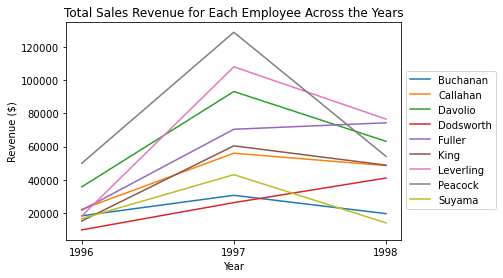

In [151]:
Year = ["1996", "1997", "1998"]

plt.plot(Year, timerev_new.Buchanan, label = "Buchanan")
plt.plot(Year, timerev_new.Callahan, label = "Callahan")
plt.plot(Year, timerev_new.Davolio, label = "Davolio")
plt.plot(Year, timerev_new.Dodsworth, label = "Dodsworth")
plt.plot(Year, timerev_new.Fuller, label = "Fuller")
plt.plot(Year, timerev_new.King, label = "King")
plt.plot(Year, timerev_new.Leverling, label = "Leverling")
plt.plot(Year, timerev_new.Peacock, label = "Peacock")
plt.plot(Year, timerev_new.Suyama, label = "Suyama")

plt.legend(bbox_to_anchor = (1, 0.8))
plt.xlabel("Year")
plt.ylabel("Revenue ($)")
plt.title("Total Sales Revenue for Each Employee Across the Years")

## Regional Performance  


The steps are:

Merge the data according to the CustomerID, OrderID and EmployeeID.

Perform the data analysis on the total sale and quantity by each regions

In [152]:
#Extract data for region 
sql='''
select d.LastName,a.CustomerID,a.Region,b.OrderID,b.EmployeeID,c.ProductID,c.Quantity,c.UnitPrice, c.Quantity*c.UnitPrice as TotalSale from Customers as a
left join Orders as b on a.CustomerID=b.CustomerID
left join 'Order Details' as c on c.OrderID=b.OrderID
left join Employees as d on d.EmployeeID=b.EmployeeID;
'''
Region=pd.read_sql( sql, con)
Region

,LastName,CustomerID,Region,OrderID,EmployeeID,ProductID,Quantity,UnitPrice,TotalSale
0,Davolio,ALFKI,None,10835.0,1.0,59.0,15.0,55.00,825.0
1,Davolio,ALFKI,None,10835.0,1.0,77.0,2.0,13.00,26.0
2,Davolio,ALFKI,None,10952.0,1.0,6.0,16.0,25.00,400.0
3,Davolio,ALFKI,None,10952.0,1.0,28.0,2.0,45.60,91.2
4,Leverling,ALFKI,None,11011.0,3.0,58.0,40.0,13.25,530.0
...,...,...,...,...,...,...,...,...,...
2154,Suyama,WOLZA,None,10611.0,6.0,60.0,15.0,34.00,510.0
2155,Callahan,WOLZA,None,10998.0,8.0,24.0,12.0,4.50,54.0
2156,Callahan,WOLZA,None,10998.0,8.0,61.0,7.0,28.50,199.5
2157,Callahan,WOLZA,None,10998.0,8.0,74.0,20.0,10.00,200.0


In [153]:
#Check the total sale and qty by employee and region
Region.groupby(["LastName","Region"])[["Quantity","TotalSale"]].sum()

Quantity  TotalSale
LastName Region                            
Buchanan ID                524.0   13868.10
         Lara               98.0    3251.50
         NM                118.0    1607.00
         Nueva Esparta     107.0    1902.10
         RJ                147.0    3865.00
...                          ...        ...
Suyama   RJ                 67.0     946.25
         SP                262.0    6054.25
         TÃ¡chira          106.0    2333.20
         WA                  9.0     237.90
         WY                 24.0      48.00

[120 rows x 2 columns]

In [154]:
#Check the total sale and qty only by employee
Region.groupby(["LastName"])[["Quantity","TotalSale"]].sum()

,Quantity,TotalSale
LastName,,
Buchanan,3036.0,75567.75
Callahan,5913.0,133301.03
Davolio,7812.0,202143.71
Dodsworth,2670.0,82964.00
Fuller,6055.0,177749.26
King,4654.0,141295.99
Leverling,7852.0,213051.30
Peacock,9798.0,250187.45
Suyama,3527.0,78198.10


In [155]:
#Check the total sale and qty only by region
Plt_Region=Region.groupby(["Region"])[["Quantity","TotalSale"]].sum()
Plt_Region

,Quantity,TotalSale
Region,,
AK,603.0,16325.15
BC,1018.0,23130.20
CA,181.0,3490.02
Co. Cork,1684.0,57317.39
DF,34.0,1488.70
ID,4958.0,115673.39
Isle of Wight,295.0,6146.30
Lara,836.0,17825.06
MT,59.0,1947.24


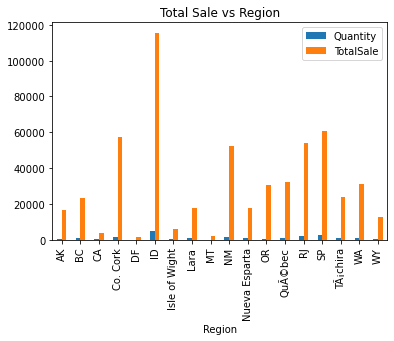

In [156]:
#Plot total sale and qty only by region
Plt_Region.plot.bar(stacked=False)
plt.title("Total Sale vs Region")
plt.show()
plt.close()

## Strengths and Weaknesses of Each Employee  
The step is to review all tables and plots. We also check the employee backgrounds to make fair suggestions and evaluations.

In [157]:

#Take background to check the employee analysis
sql='''
select distinct EmployeeID,LastName,FirstName,Title,Notes from Employees;
'''
Emp=pd.read_sql(sql,con)
Emy_Sug={}
for i in range(len(list(Emp['EmployeeID']))):
    print(Emp.loc[i,"FirstName"],Emp.loc[i,"LastName"]," : ",Emp.loc[i,"Notes"],"\n")

Nancy Davolio  :  Education includes a BA in psychology from Colorado State University in 1970.  She also completed "The Art of the Cold Call."  Nancy is a member of Toastmasters International. 

Andrew Fuller  :  Andrew received his BTS commercial in 1974 and a Ph.D. in international marketing from the University of Dallas in 1981.  He is fluent in French and Italian and reads German.  He joined the company as a sales representative, was promoted to sales manager in January 1992 and to vice president of sales in March 1993.  Andrew is a member of the Sales Management Roundtable, the Seattle Chamber of Commerce, and the Pacific Rim Importers Association. 

Janet Leverling  :  Janet has a BS degree in chemistry from Boston College (1984).  She has also completed a certificate program in food retailing management.  Janet was hired as a sales associate in 1991 and promoted to sales representative in February 1992. 

Margaret Peacock  :  Margaret holds a BA in English literature from Conco

## The employees analysis is based on the plot and table we had created and employee note. The evaluation for employees are following:

Nancy Davolio : She has strong selling on dairy products. However, she only had BS degree, if she earn advanced degree, she would be potential on selling field.

Andrew Fuller : Andrew is one of two employees who have better performance by each year. His education and experience are the most skilled employee of all. Thus, there is one thing that he could improve on beverages. He could be much better on beverage product.

Janet Leverling : Janet has above selling performance cross all categoies of products. She kept learning food retailing management while she was working. Thus, she is above average on all food products. She is also top seller in 1998.

Margaret Peacock : Margaret is the most total sold record cross all products among employees. If he could remain this performance, he will be promoted.

Steven Buchanan : Steven is with performance much below average. He needs to improve all skills and/or return school for advanced education

Michael Suyama : Michael is with great edcuation and mulitple languages. However, he is bottom performance in 1998. He needs to work harder to match what he is supposed to perform

Robert King : Robert is about the average among all employees. He has a lot of room to improve overall.

Laura Callahan : Laura is about the average among all employees. She could go for advanced education for potential growth.

Anne Dodsworth : Anne is with bottom selling performance overall. However, she is getting better by each year. She could focus on meat, grains and produce for improvement.